In [2]:
import tweepy 
import csv
import numpy as np
import pandas as pd
import datetime
# pour l'interaction avec l'utilisateur
import time
import sys
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx
import matplotlib.pyplot as plt
import random

In [12]:
# pour l'interaction avec l'utilisateur
import time
import sys

#Twitter API mots de passe
consumer_key = "TgcEdV8XOtk3PqP6Rr3Sexsbh"
consumer_secret = "xzhLUfQCmykmq6KMjGhOQCmMzbZHUKC7I7mruwKVcvD6RybjRM"
access_key = "1047852038263123969-9S6iK7QwsJEXgDgS5IWp3gmS5Y5QfZ"
access_secret = "H47TY7zp<q4eyOmeznboG8bhIlWVsD1cpS3ZRdA7bj5Jcu"

OAUTH_KEYS = {'consumer_key':consumer_key, 'consumer_secret':consumer_secret,
 'access_token_key':access_key, 'access_token_secret':access_secret}
auth = tweepy.OAuthHandler(OAUTH_KEYS['consumer_key'], OAUTH_KEYS['consumer_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Tweets-Retweets
## Importation des Tweets-retweets 


In [15]:
searchTerm='#Khashoggi'
NoOfTerms=10000000000000000000000
search = tweepy.Cursor(api.search, q=searchTerm).items(NoOfTerms) # ici on spécifie le mot clé, cursor=current_cursor

df = pd.DataFrame()
user_id=[]
username= []
created_at_val=[]
text_val=[]
lang= []
entities= []
retweeted_status= []
retweet_count= []
favorite_count= []
userlocation=[]
entities=[]
id=[]

In [23]:
created_at_val=[]
for tweet in search:
    current_cursor = search.next
    date=tweet.created_at
    if(((date).strftime('%m/%d/%Y'))!="09/31/2018"):
        #print tweet.user.screen_name, tweet.created_at, tweet.text
        user_id.append(tweet.user._json["id"])
        created_at_val.append(date)
        text_val.append(tweet.text)
        username.append(tweet.user._json["name"])
        userlocation.append(tweet.user._json["location"])
        retweet_count.append(tweet.retweet_count)
        favorite_count.append(tweet.favorite_count)
        lang.append(tweet.lang)
        entities.append(tweet.entities)
        id.append(tweet.id_str)
        if hasattr(tweet, 'retweeted_status'):
            retweeted_status.append(tweet.retweeted_status.id_str)
        else:
            retweeted_status.append("0")
    else :
        break

Rate limit reached. Sleeping for: 620
Rate limit reached. Sleeping for: 603
Rate limit reached. Sleeping for: 616
Rate limit reached. Sleeping for: 534
Rate limit reached. Sleeping for: 562
Rate limit reached. Sleeping for: 589
Rate limit reached. Sleeping for: 619
Rate limit reached. Sleeping for: 620
Rate limit reached. Sleeping for: 489


In [24]:
df3 = pd.DataFrame()
df3['id'] = user_id
df3['timestamp'] = created_at_val
df3['username'] = username
df3['text'] =text_val
df3['lang'] = lang
df3['entities'] = entities
df3['retweeted_status'] = retweeted_status
df3['retweet_count'] = retweet_count
df3['favorite_count'] = favorite_count
df3['userlocation'] = userlocation

df3.tail()


,id,timestamp,username,text,lang,entities,retweeted_status,retweet_count,favorite_count,userlocation
61145,28117564,2018-10-31 15:22:35,Bobby Bush,#Khashoggi @realDonaldTrump #MBS #Murder \nTim...,en,"{'hashtags': [{'text': 'Khashoggi', 'indices':...",0,0,2,Las Vegas
61146,475308891,2018-10-31 15:22:29,Thomas·王 🍁,Turkish prosecutor says Saudi writer strangled...,en,"{'hashtags': [{'text': 'JamalKhashoggi', 'indi...",0,0,0,"Vancouver 溫哥華, Canada 加拿大 🇨🇦"
61147,155784594,2018-10-31 15:22:29,Tommy Vietor,RT @mehdirhasan: If you don't listen to @TViet...,en,"{'hashtags': [{'text': 'PodSaveTheWorld', 'ind...",1057639072175439872,50,0,"Los Angeles, CA"
61148,2344889405,2018-10-31 15:22:13,ابو عهد,RT @KarenAttiah: I know there a lot going on i...,en,"{'hashtags': [{'text': 'khashoggi', 'indices':...",1057458449959796737,1435,0,طرابلس _ ليبيا
61149,74149816,2018-10-31 15:22:13,Notgoing Totellyou,RT @KarenAttiah: Before Jamal #khashoggi’s mur...,en,"{'hashtags': [{'text': 'khashoggi', 'indices':...",1057641884783427584,480,0,


In [58]:
#df3.to_csv('khashoggiwithtimeline3.csv',index = False,encoding='utf-8')

## Number of Tweets per Day

In [4]:
#df2=pd.read_csv('khashoggiwithtimeline2.csv')
df3=pd.read_csv('khashoggiwithtimeline3.csv')
df3.tail()
df3=df3[df3.retweet_count!=0]

In [4]:

df3['DateStr']=df3.timestamp.str[0:10]
df3['DateHour']=df3.timestamp.str[0:13]
df3.tail()
x=df3.groupby(['DateHour']).size()
y=df3.groupby(['DateStr']).size()
y


DateStr
2018-10-31    7217
2018-11-01    6599
2018-11-02    8292
2018-11-03    6944
2018-11-04    6170
2018-11-05    7340
2018-11-06    3007
2018-11-07    2216
2018-11-08    2387
2018-11-09    4147
2018-11-10    1694
dtype: int64

In [5]:
indexs=df3['DateStr'].unique()
tretweets=pd.Series(data=y,index=df3['DateStr'].unique())
tretweets.head()
len(df3['DateStr'].unique())
len(y)

11

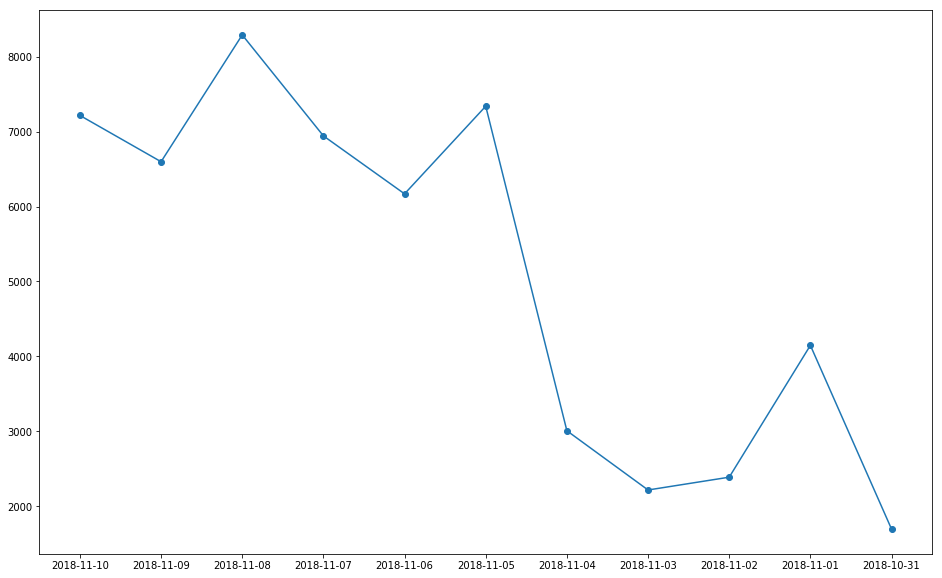

In [30]:
from matplotlib.pyplot import figure
plt.figure(figsize=(16,10))
plt.plot(indexs,y,linestyle='-', marker='o')


## Example de graphes de Réseau Tweet-Retweets


### Digraphe du réseau avec 300 retweets

In [5]:
df3=df3[df3.retweet_count!=0]
df3.head()


,id,timestamp,username,text,lang,entities,retweeted_status,retweet_count,favorite_count,userlocation,DateHour,DateStr
0,944112806231547904,2018-11-10 07:40:28,Brien Pike,RT @KarenAttiah: It’s been 40 days since @Wash...,en,"{'hashtags': [{'text': 'Khashoggi', 'indices':...",1.060957e+18,2361.0,0.0,NaN,2018-11-10 07,2018-11-10
1,76381965,2018-11-10 07:40:24,Daniel Casson,RT @Miditun: Another journalist has been 'kill...,en,"{'hashtags': [{'text': 'Khashoggi', 'indices':...",1.060982e+18,30.0,0.0,NaN,2018-11-10 07,2018-11-10
2,2492411154,2018-11-10 07:40:00,The Big Ship,RT @KarenAttiah: It’s been 40 days since @Wash...,en,"{'hashtags': [{'text': 'Khashoggi', 'indices':...",1.060957e+18,2361.0,0.0,"Curmudgeon Cove, Australia",2018-11-10 07,2018-11-10
3,1564535599,2018-11-10 07:39:31,عمر الشمري,"RT @Essa_Younes: Como parece, esta guerra medi...",es,"{'hashtags': [], 'symbols': [], 'user_mentions...",1.061021e+18,30.0,0.0,NaN,2018-11-10 07,2018-11-10
4,79241186,2018-11-10 07:39:30,Arun Rao,RT @KarenAttiah: It’s been 40 days since @Wash...,en,"{'hashtags': [{'text': 'Khashoggi', 'indices':...",1.060957e+18,2361.0,0.0,NaN,2018-11-10 07,2018-11-10


In [6]:
df3_s=df3.sample(300)
edges = []
twnumber =[]
for d in df3_s.values: 
    edges.append((d[0],d[6]))
len(edges)
h1 = nx.DiGraph()


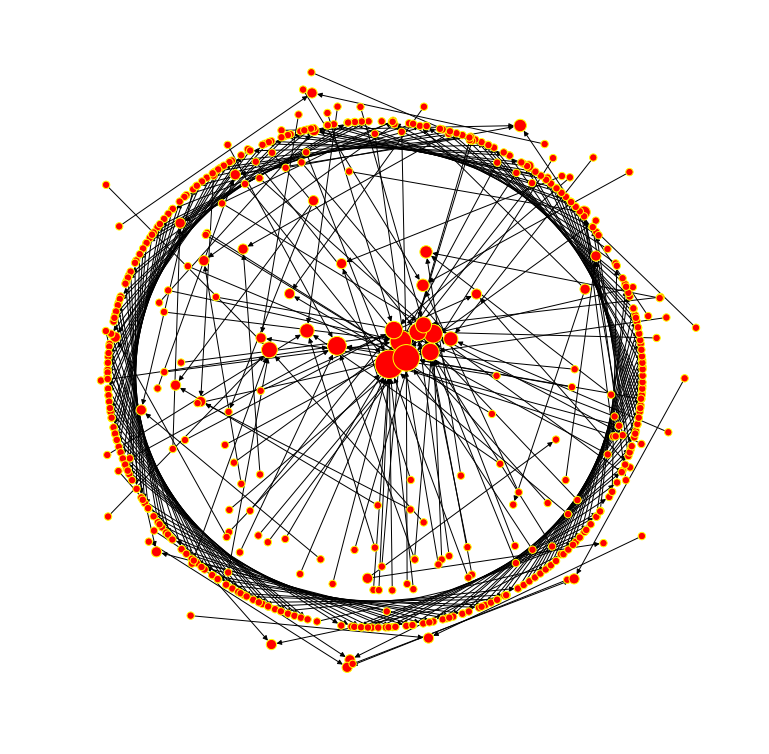

In [6]:
h1 = nx.DiGraph()

plt.figure(figsize=(10,10))
h1.add_edges_from(edges[:])
nx.draw_kamada_kawai(h1,node_size=[dg[1]*50+5 for dg in nx.degree(h1)],edgecolors ='yellow')


### Digraphe avec 2000 retweets

In [7]:
df3_sample=df3.sample(2000)

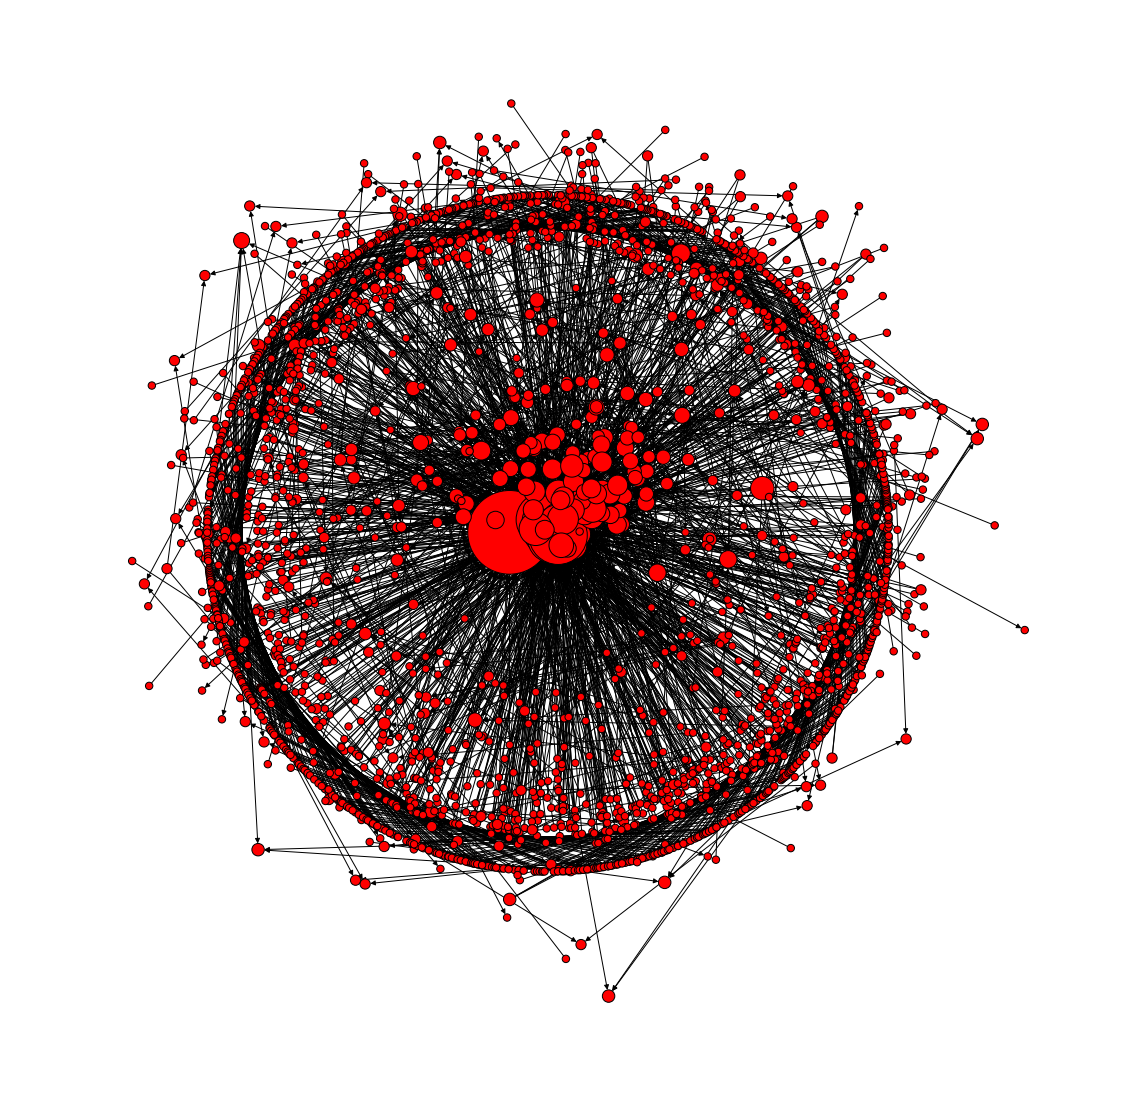

In [8]:
edges = []
for d in df3_sample.values: 
    edges.append((d[0],d[6]))
    twnumber.append(d[7])
len(edges)
h2 = nx.DiGraph()
plt.figure(figsize=(15,15))
h2.add_edges_from(edges[:])
nx.draw_kamada_kawai(h2,node_size=[dg[1]*50+5 for dg in nx.degree(h2)],edgecolors='black')

In [7]:
df3_s=df3_s[df3_s.retweeted_status != 0]
#df3_sample=df3_sample[df3_sample.retweeted_status != 0]

### nx.Graphe (principalement pour l'analyse du réseau ensuite)

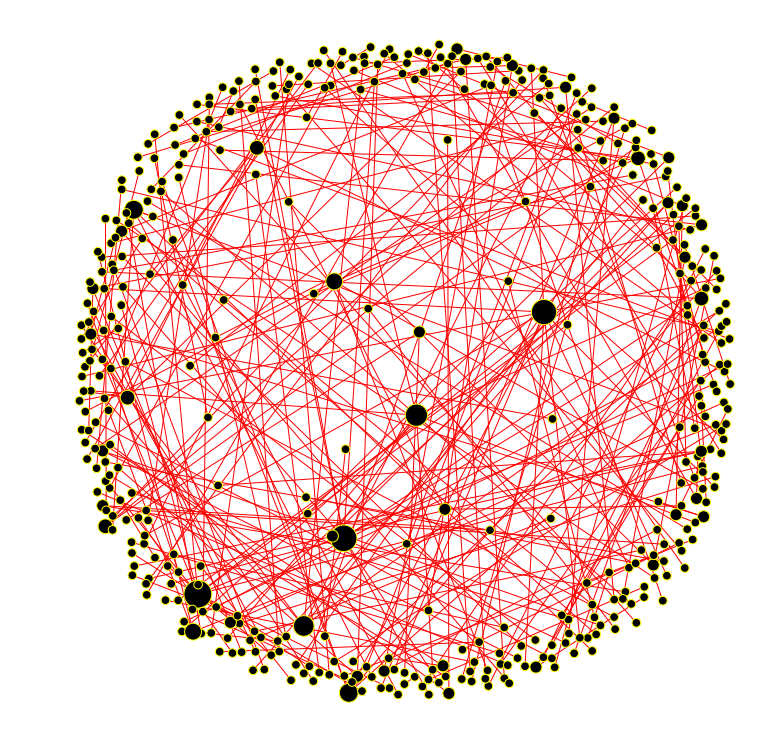

In [8]:
edges = []
for d in df3_s.values: 
    edges.append((d[0],d[6]))
len(edges)
h3 = nx.Graph()

plt.figure(figsize=(10,10))
h3.add_edges_from(edges[:])
nx.draw(h3,edgecolors='yellow', pos=nx.spring_layout(h3,k=1),node_color='k',edge_color='r',
        node_size=[dg[1]*70+5 for dg in nx.degree(h3)])

## Analyse de la forme du réseau

### Densité du réseau

In [9]:
densite = nx.density(h3)
print("Densite du Reseau =", densite)

Densite du Reseau = 0.0026568208013440387


### Largest subgraph

Network diameter of largest component: 2


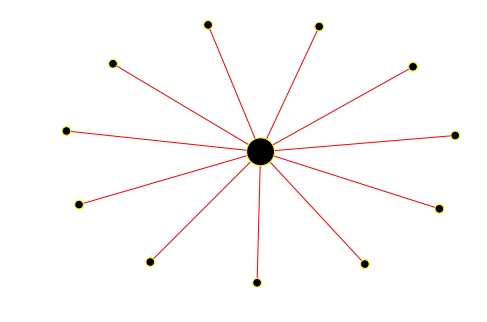

In [10]:
components = nx.connected_components(h3)
largest_component = max(components, key=len)
subgraph = h3.subgraph(largest_component)
diameter = nx.diameter(subgraph)
nx.draw(subgraph,edgecolors='yellow', pos=nx.spring_layout(subgraph,k=1),node_color='k',edge_color='r',
        node_size=[dg[1]*70+5 for dg in nx.degree(subgraph)])
print("Network diameter of largest component:", diameter)

### Example of shortest path 

In [13]:
triadic_closure = nx.transitivity(h3)
print("Triadic closure:", triadic_closure)#the less the more dense the graph

Triadic closure: 0


### Centrality (Importance des noeuds) et betweenness

In [11]:
degree_dict = dict(h3.degree(h3.nodes()))
d=nx.set_node_attributes(h3, degree_dict, 'degree')

In [13]:
from operator import itemgetter
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by degree:")
for n in sorted_degree[:10]:
    print(n)

Top 10 nodes by degree:
(1.0586940874470564e+18, 11)
(1.0599641266786632e+18, 10)
(1.059201074140246e+18, 9)
(1.0609573080821023e+18, 7)
(1.0574572671115428e+18, 6)
(1.0595808062833459e+18, 5)
(1.0584308852115948e+18, 5)
(1.0593033353108439e+18, 4)
(1.0574584499597967e+18, 4)
(1.0576418847834276e+18, 3)


In [17]:
betweenness_dict = nx.betweenness_centrality(h3) # Run betweenness centrality
nx.set_node_attributes(h3, betweenness_dict, 'betweenness')


In [160]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
(1.0609573080821023e+18, 0.0002796420581655481)
(1.0590737079294157e+18, 0.0002796420581655481)
(1.0584308852115948e+18, 0.00020973154362416107)
(1.0595808062833459e+18, 0.00020973154362416107)
(1.059201074140246e+18, 0.00020973154362416107)
(1.0592882936432927e+18, 0.00014980824544582935)
(1.0592514297251267e+18, 0.00014980824544582935)
(118508394, 0.00011984659635666346)
(1.057955739380138e+18, 0.00010985937999360819)
(1.0574572671115428e+18, 9.98721636305529e-05)
(1.0586940874470564e+18, 9.98721636305529e-05)
(1.0576418847834276e+18, 5.992329817833173e-05)
(1.0599641266786632e+18, 5.992329817833173e-05)
(1.0574584499597967e+18, 5.992329817833173e-05)
(1.0593033353108439e+18, 5.992329817833173e-05)
(1.0576332587106099e+18, 5.992329817833173e-05)
(735701744, 4.993608181527645e-05)
(1.0583392208493445e+18, 2.9961649089165866e-05)
(1.0591604691041935e+18, 2.9961649089165866e-05)
(1.0582111098854113e+18, 2.9961649089165866e-05)


### Community detection and modularity

In [25]:
import networkx as nx
import community 
#type(pos)

In [26]:
communities = community.best_partition(h3)
communities


{385689121: 0,
 1.0609667100508037e+18: 0,
 3134644380: 1,
 1.0574572671115428e+18: 1,
 815369540364304384: 2,
 1.0595808062833459e+18: 2,
 983727376235466752: 3,
 1.0599641266786632e+18: 3,
 56082886: 3,
 913183751613636614: 4,
 1.0581067395251077e+18: 4,
 853249124757422082: 5,
 1.0576345896178606e+18: 5,
 831577159605039105: 6,
 1.0583693693471007e+18: 6,
 761419439849938944: 7,
 1.0592444175451341e+18: 7,
 2192849143: 8,
 1.0584308852115948e+18: 8,
 701442504797896705: 2,
 3216200601: 9,
 1.0596233074887066e+18: 9,
 943155141599023104: 10,
 1.059082617025368e+18: 10,
 1877724745: 11,
 1.0576346631607828e+18: 11,
 2315694780: 12,
 1.0601988575340052e+18: 12,
 192547775: 13,
 1.0576739683359457e+18: 13,
 1002295410227056641: 14,
 1.0570006241710203e+18: 14,
 2321148577: 15,
 1.0585733932331745e+18: 15,
 1033658644699656193: 16,
 1.0569027351262495e+18: 16,
 971069671616270338: 17,
 1.0576374459597373e+18: 17,
 873784274641715200: 8,
 860719004016574464: 18,
 1.0576418847834276e+18: 1

#### Drawing some communities

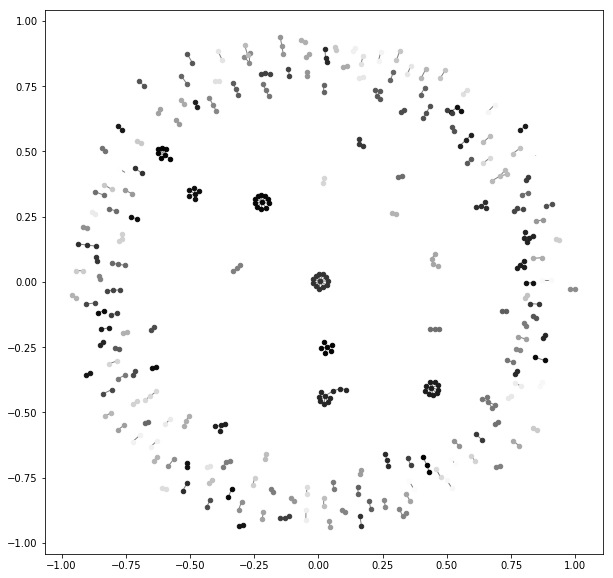

In [34]:
partition = community.best_partition(h3)
plt.figure(figsize=(10,10))
#drawing
G = nx.erdos_renyi_graph(30, 1)
size = float(len(set(partition.values())))
pos = nx.spring_layout(h3)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(h3, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(h3, pos, alpha=0.5)


#### Modularity

In [30]:
nx.set_node_attributes(h3, communities, 'modularity')

In [31]:
modularity = {} # Create a new, empty dictionary
for k,v in communities.items(): # Loop through the community dictionary
    if v not in modularity:
        modularity[v] = [k] # Add a new key for a modularity class the code hasn't seen before
    else:
        modularity[v].append(k) # Append a name to the list for a modularity class the code has already seen

for k,v in modularity.items(): # Loop through the new dictionary
    if len(v) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(k)+':', v) # Print out the classes and their members

Class 0: [385689121, 1.0609667100508037e+18, 199201124]
Class 1: [3134644380, 1.0574572671115428e+18, 395492440, 2681735307, 2202404829, 390108954, 70990731]
Class 2: [815369540364304384, 1.0595808062833459e+18, 701442504797896705, 389172156, 3187676078, 3137560986]
Class 3: [983727376235466752, 1.0599641266786632e+18, 56082886, 1260458809, 3235902361, 860202998, 227827584, 146687597, 1047263720714510338, 883355384240627712, 3191641932]
Class 8: [2192849143, 1.0584308852115948e+18, 873784274641715200, 999422301413302272, 170004277, 847955550]
Class 10: [943155141599023104, 1.059082617025368e+18, 806053741]
Class 18: [860719004016574464, 1.0576418847834276e+18, 497343565, 2976810483]
Class 19: [242414823, 1.059201074140246e+18, 86736976, 46885773, 240253673, 3283061317, 1405116534, 333717758, 1054704565164167168, 3753494775]
Class 20: [2172500584, 1.0609435546195436e+18, 873187048613654530, 631858291]
Class 22: [515364355, 1.0580334063727329e+18, 60565560]
Class 23: [20566511, 1.0593033

In [32]:
# First get a list of just the nodes in that class
class0 = [n for n in h3.nodes() if h3.node[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:h3.node[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: 1.0609667100508037e+18 | Eigenvector Centrality: 5.5184925959612944e-39
Name: 385689121 | Eigenvector Centrality: 3.9021635365319856e-39
Name: 199201124 | Eigenvector Centrality: 3.9021635365319856e-39


# Words redundancy

## Most used words in tweets , horizontal bar plot

In [30]:
WORDS=pd.Series(' '.join(df3['text']).lower().split()).value_counts()[:100]
len(WORDS)
WORDS
len(WORDS)
dfWORDS=pd.Series.to_frame(WORDS)
WORDS=dfWORDS[dfWORDS.index.str.len()>4]
WORDS
remove=['still','about','&amp;','since','after','@sibeledmonds:','regim…','their','those','#saudi','twitter','given','washington','@karenattiah:','@jack:','@twitter','never','jack','(@saudq1978)','@ragipsoylu:','@ajenglish:','@5a1di:','today,','https://t.co/t2jgkojvi4','khashoggi','(@jkhashoggi)','(@gatesfoundation)','murd…','until','going','#khashoggi\'s','let\'s','there','answers.','let’s','https:…','@karenattiah','op-ed','we’re','@amjadt25:','#ivoted']
WORDS=WORDS[~WORDS.index.isin(remove)]
WORDS


,0
#khashoggi,30418
saudi,15009
jamal,12323
@washingtonpost,5500
murder,3961
arabia,3469
turkish,3463
writer,2961
prince,2935
crown,2740


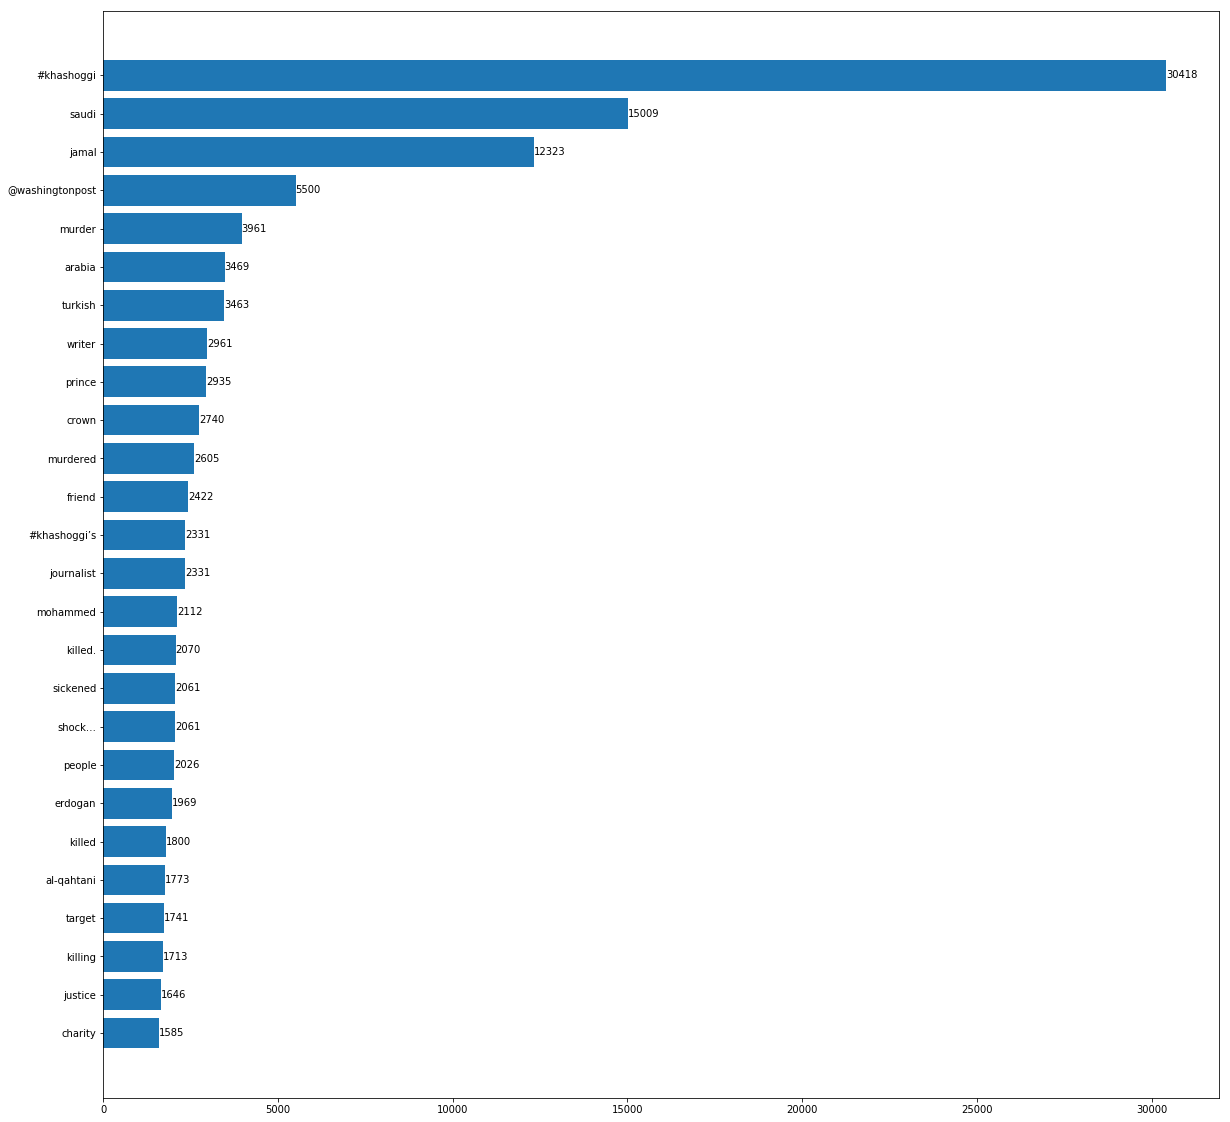

In [63]:
WORDS=WORDS.sort_values(0,ascending=True)
X=WORDS.index
Y=WORDS[0]
plt.figure(figsize=(20,20))
plt.barh(X,Y)
for y, x in enumerate(WORDS[0]):
    plt.annotate(str(x), xy=(x, y), va='center')

## Creation of a WorldCloud for most used words in the tweets

In [138]:
WORDS_5=pd.Series(' '.join(df3['text']).lower().split()).value_counts()[:300]
dfWORDS_5=pd.Series.to_frame(WORDS_5)
WORDS_5=dfWORDS_5[dfWORDS_5.index.str.len()>4]
WORDS_5
remove=['still','about','&amp;','since','after','@sibeledmonds:','regim…','their','those','#saudi','twitter','given','washington','@karenattiah:','@jack:','@twitter','never','jack','(@saudq1978)','@ragipsoylu:','@ajenglish:','@5a1di:','today,','https://t.co/t2jgkojvi4','khashoggi','(@jkhashoggi)','(@gatesfoundation)','murd…','until','going','#khashoggi\'s','let\'s','there','answers.','let’s','https:…','@karenattiah','op-ed','we’re','@amjadt25:','#ivoted']
WORDS_5=WORDS_5[~WORDS_5.index.isin(remove)]
WORDS_5[:10]


,0
#khashoggi,30418
saudi,15009
jamal,12323
@washingtonpost,5500
murder,3961
arabia,3469
turkish,3463
writer,2961
prince,2935
crown,2740


In [ ]:
WORDS=pd.Series(' '.join(df3['text']).lower().split()).value_counts()[:300]
len(WORDS)

In [138]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imageio import imread

In [244]:
Tweet_mask = imread("C:\\Users\\Admin\\Downloads\\twitter_mask.png")
#WORDS_5['index1'] = WORDS_5.index 
#WORDS_5.columns=['Frequency','word']
WORDS_5.values

array([[30418, '#khashoggi'],
       [15009, 'saudi'],
       [12323, 'jamal'],
       [5500, '@washingtonpost'],
       [3961, 'murder'],
       [3469, 'arabia'],
       [3463, 'turkish'],
       [2961, 'writer'],
       [2935, 'prince'],
       [2740, 'crown'],
       [2605, 'murdered'],
       [2422, 'friend'],
       [2331, '#khashoggi’s'],
       [2331, 'journalist'],
       [2112, 'mohammed'],
       [2070, 'killed.'],
       [2061, 'sickened'],
       [2061, 'shock…'],
       [2026, 'people'],
       [1969, 'erdogan'],
       [1800, 'killed'],
       [1773, 'al-qahtani'],
       [1741, 'target'],
       [1713, 'killing'],
       [1646, 'justice'],
       [1585, 'charity'],
       [1578, 'under'],
       [1570, 'saudis'],
       [1565, 'brutally'],
       [1536, '#saudiarabia'],
       [1536, 'prosecutor'],
       [1503, 'weeks'],
       [1495, '#justiceforjamal'],
       [1483, 'truth'],
       [1455, 'president'],
       [1402, '#turkey'],
       [1379, 'foundation'],
       [1

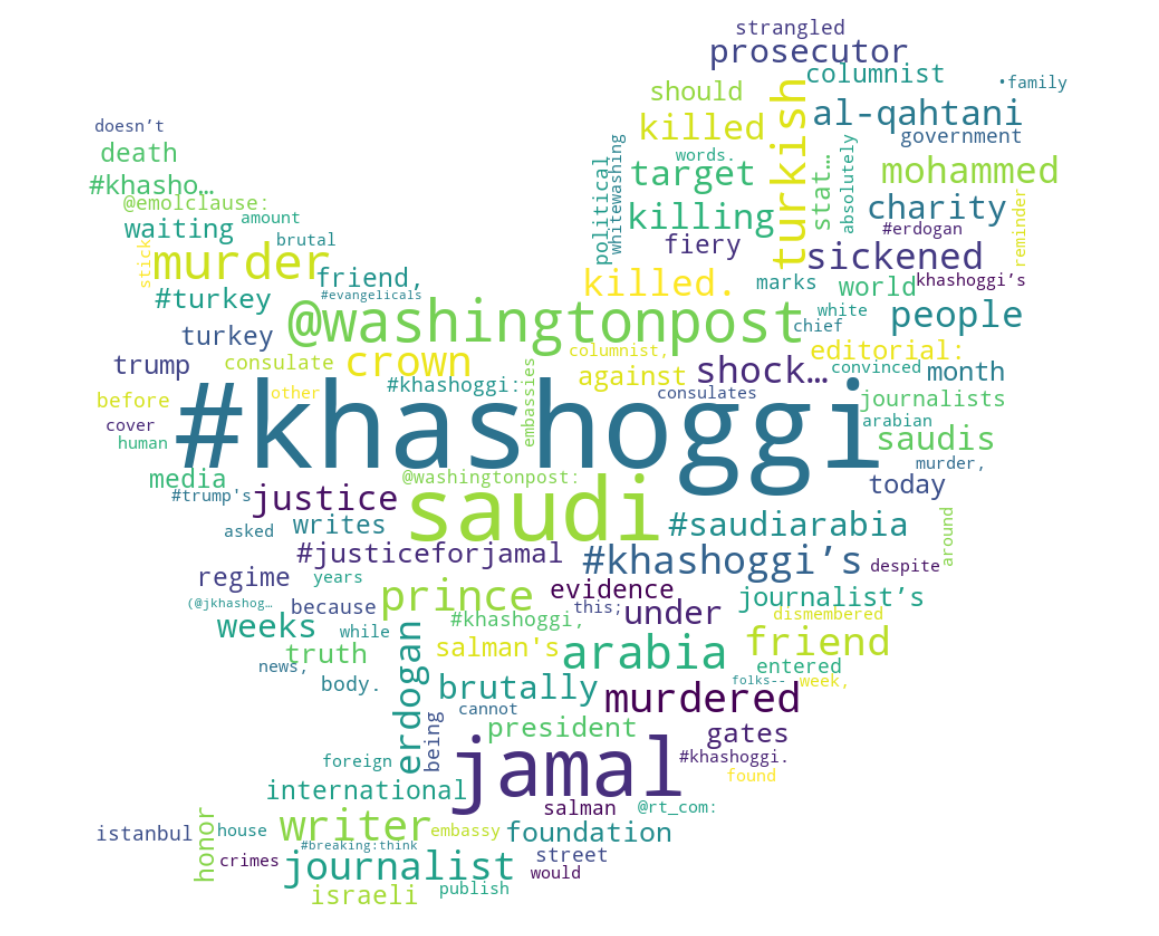

In [229]:
d = {}
for x,a in WORDS_5.values:
    d[a] = x
wordcloud = WordCloud(background_color="white", mask = Tweet_mask)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.savefig('C:\\Users\\Admin\\Downloads\\khashwordcloud.png', dpi=300)
plt.show()


,id,timestamp,username,text,lang,entities,retweeted_status,retweet_count,favorite_count,userlocation,DateHour,DateStr
0,944112806231547904,2018-11-10 07:40:28,Brien Pike,RT @KarenAttiah: It’s been 40 days since @Wash...,en,"{'hashtags': [{'text': 'Khashoggi', 'indices':...",1.060957e+18,2361.0,0.0,NaN,2018-11-10 07,2018-11-10
1,76381965,2018-11-10 07:40:24,Daniel Casson,RT @Miditun: Another journalist has been 'kill...,en,"{'hashtags': [{'text': 'Khashoggi', 'indices':...",1.060982e+18,30.0,0.0,NaN,2018-11-10 07,2018-11-10
2,2492411154,2018-11-10 07:40:00,The Big Ship,RT @KarenAttiah: It’s been 40 days since @Wash...,en,"{'hashtags': [{'text': 'Khashoggi', 'indices':...",1.060957e+18,2361.0,0.0,"Curmudgeon Cove, Australia",2018-11-10 07,2018-11-10
3,1564535599,2018-11-10 07:39:31,عمر الشمري,"RT @Essa_Younes: Como parece, esta guerra medi...",es,"{'hashtags': [], 'symbols': [], 'user_mentions...",1.061021e+18,30.0,0.0,NaN,2018-11-10 07,2018-11-10
4,79241186,2018-11-10 07:39:30,Arun Rao,RT @KarenAttiah: It’s been 40 days since @Wash...,en,"{'hashtags': [{'text': 'Khashoggi', 'indices':...",1.060957e+18,2361.0,0.0,NaN,2018-11-10 07,2018-11-10
5,2425080456,2018-11-10 07:38:41,HBNEWS,RT @KarenAttiah: It’s been 40 days since @Wash...,en,"{'hashtags': [{'text': 'Khashoggi', 'indices':...",1.060957e+18,2361.0,0.0,NaN,2018-11-10 07,2018-11-10
6,238412677,2018-11-10 07:38:24,Tash,RT @KarenAttiah: It’s been 40 days since @Wash...,en,"{'hashtags': [{'text': 'Khashoggi', 'indices':...",1.060957e+18,2361.0,0.0,"Sydney, Australia",2018-11-10 07,2018-11-10
7,28784606,2018-11-10 07:37:53,"Alyaa Gad, MD",RT @AmnestyNow: We were in Ottawa this morning...,en,"{'hashtags': [], 'symbols': [], 'user_mentions...",1.060567e+18,120.0,0.0,Thytochus,2018-11-10 07,2018-11-10
9,1014548976,2018-11-10 07:37:30,IQ,RT @RT_com: Edward @Snowden: Software from Isr...,en,"{'hashtags': [], 'symbols': [], 'user_mentions...",1.060914e+18,200.0,0.0,NaN,2018-11-10 07,2018-11-10
10,412543564,2018-11-10 07:37:28,JnOuBi,RT @KarenAttiah: Houthi leader Mohammed Ali al...,en,"{'hashtags': [], 'symbols': [], 'user_mentions...",1.060967e+18,271.0,0.0,Deutschland,2018-11-10 07,2018-11-10
